In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "Synthetic_patient-HealthCare-Monitoring_dataset 3.csv"

COL_PATIENT_NUM = "Patient Number"
COL_HR          = "Heart Rate (bpm)"
COL_SPO2        = "SpO2 Level (%)"
COL_SYS_BP      = "Systolic Blood Pressure (mmHg)"
COL_DIA_BP      = "Diastolic Blood Pressure (mmHg)"
COL_TEMP        = "Body Temperature (°C)"
COL_FALL        = "Fall Detection"
COL_PRED_DIS    = "Predicted Disease"
COL_ACC         = "Data Accuracy (%)"
COL_HR_ALERT    = "Heart Rate Alert"
COL_SPO2_ALERT  = "SpO2 Level Alert"
COL_BP_ALERT    = "Blood Pressure Alert"
COL_TEMP_ALERT  = "Temperature Alert"

numeric_cols = [
    COL_HR,
    COL_SPO2,
    COL_SYS_BP,
    COL_DIA_BP,
    COL_TEMP,
    COL_ACC,
]

categorical_cols = [
    COL_PATIENT_NUM, 
    COL_FALL,
    COL_PRED_DIS,
    COL_HR_ALERT,
    COL_SPO2_ALERT,
    COL_BP_ALERT,
    COL_TEMP_ALERT,
]


df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
print("\nHead:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nDescriptive statistics (numeric):")
print(df[numeric_cols].describe())


Dataset shape: (60000, 13)

Head:
   Patient Number  Heart Rate (bpm)  SpO2 Level (%)  \
0               1                98              96   
1               2               105              97   
2               3                90              85   
3               4               102              87   
4               5                81              95   

   Systolic Blood Pressure (mmHg)  Diastolic Blood Pressure (mmHg)  \
0                             120                               86   
1                             177                              104   
2                             139                               57   
3                             101                               77   
4                             172                              119   

   Body Temperature (°C) Fall Detection  Predicted Disease  Data Accuracy (%)  \
0                   38.1             No  Diabetes Mellitus                 95   
1                   37.6             No      Heart D

In [ ]:

ranges = {
    COL_HR:     (30, 220),   # bpm # type: ignore
    COL_SPO2:   (70, 100),   # %
    COL_SYS_BP: (70, 250),   # mmHg
    COL_DIA_BP: (40, 150),   # mmHg
    COL_TEMP:   (34, 42),    # °C
    COL_ACC:    (0, 100),    # % # type: ignore
}

df_clean = df.copy()

for col, (low, high) in ranges.items():
    if col not in df_clean.columns:
        print(f"WARNING: Column '{col}' not found. Skipping.")
        continue
    
    mask_invalid = (df_clean[col] < low) | (df_clean[col] > high)
    n_invalid = mask_invalid.sum()
    print(f"{col}: {n_invalid} values outside [{low}, {high}] -> set to NaN")
    
    df_clean.loc[mask_invalid, col] = np.nan

print("Missing values BEFORE imputation:")
print(df_clean[numeric_cols].isna().sum())

for col in numeric_cols:
    if col not in df_clean.columns:
        continue
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

print("Missing values AFTER imputation:")
print(df_clean[numeric_cols].isna().sum())

before_rows = df_clean.shape[0]
df_clean.drop_duplicates(inplace=True)
after_rows = df_clean.shape[0]
print(f"\nRemoved {before_rows - after_rows} duplicate rows.")


Heart Rate (bpm): 0 values outside [30, 220] -> set to NaN
SpO2 Level (%): 0 values outside [70, 100] -> set to NaN
Systolic Blood Pressure (mmHg): 0 values outside [70, 250] -> set to NaN
Diastolic Blood Pressure (mmHg): 0 values outside [40, 150] -> set to NaN
Body Temperature (°C): 0 values outside [34, 42] -> set to NaN
Data Accuracy (%): 0 values outside [0, 100] -> set to NaN

Missing values BEFORE imputation:
Heart Rate (bpm)                   0
SpO2 Level (%)                     0
Systolic Blood Pressure (mmHg)     0
Diastolic Blood Pressure (mmHg)    0
Body Temperature (°C)              0
Data Accuracy (%)                  0
dtype: int64

Missing values AFTER imputation:
Heart Rate (bpm)                   0
SpO2 Level (%)                     0
Systolic Blood Pressure (mmHg)     0
Diastolic Blood Pressure (mmHg)    0
Body Temperature (°C)              0
Data Accuracy (%)                  0
dtype: int64

Removed 0 duplicate rows.


/var/folders/lg/yh68bnfn6pb_lt3_47jnjhm40000gn/T/ipykernel_18110/931862317.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
/var/folders/lg/yh68bnfn6pb_lt3_47jnjhm40000gn/T/ipykernel_18110/931862317.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

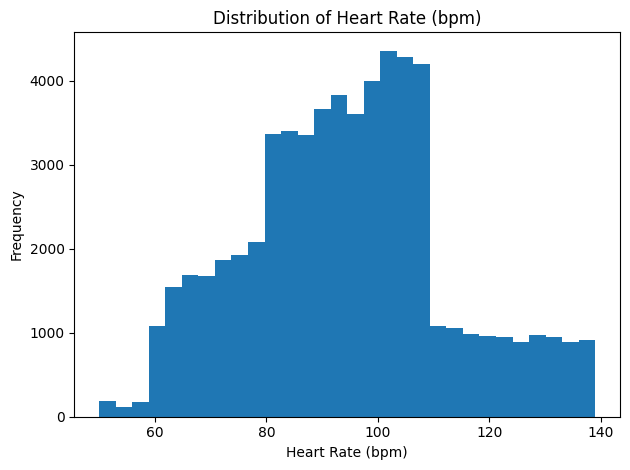

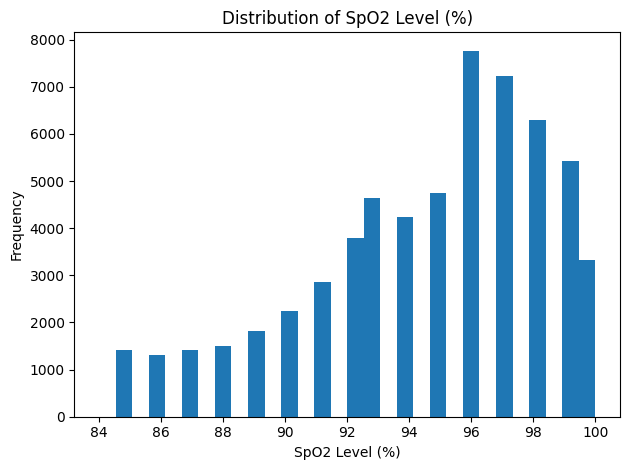

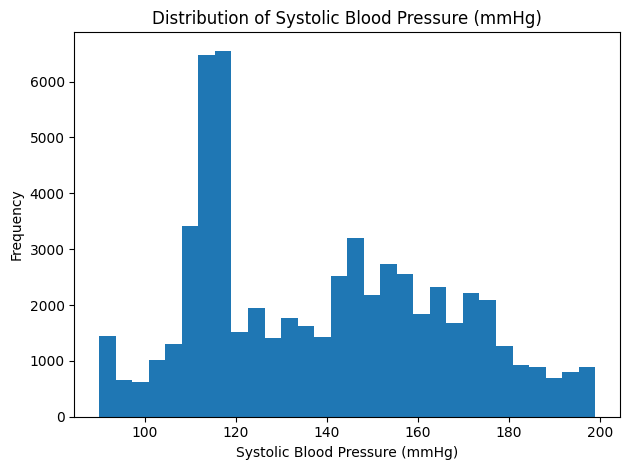

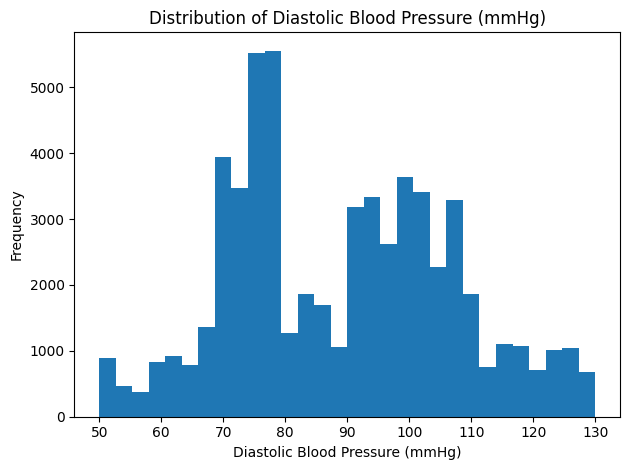

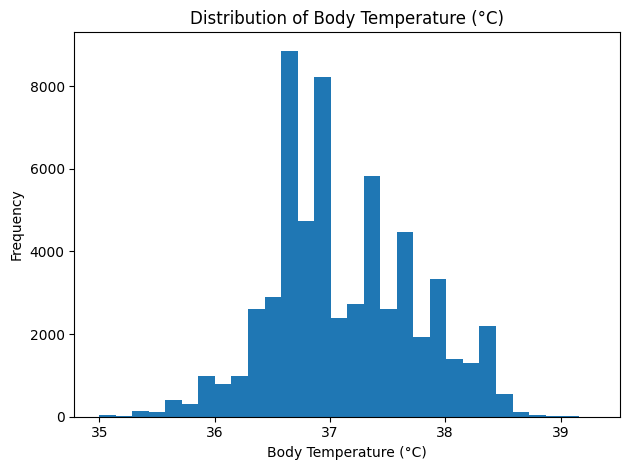

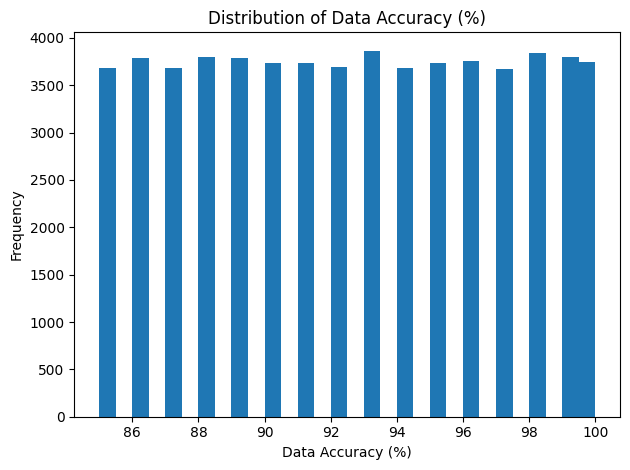

In [4]:

def plot_histogram(series, title, bins=30):
    plt.figure()
    plt.hist(series.dropna(), bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_histogram(df_clean[COL_HR], "Distribution of Heart Rate (bpm)")
plot_histogram(df_clean[COL_SPO2], "Distribution of SpO2 Level (%)")
plot_histogram(df_clean[COL_SYS_BP], "Distribution of Systolic Blood Pressure (mmHg)")
plot_histogram(df_clean[COL_DIA_BP], "Distribution of Diastolic Blood Pressure (mmHg)")
plot_histogram(df_clean[COL_TEMP], "Distribution of Body Temperature (°C)")
plot_histogram(df_clean[COL_ACC], "Distribution of Data Accuracy (%)")


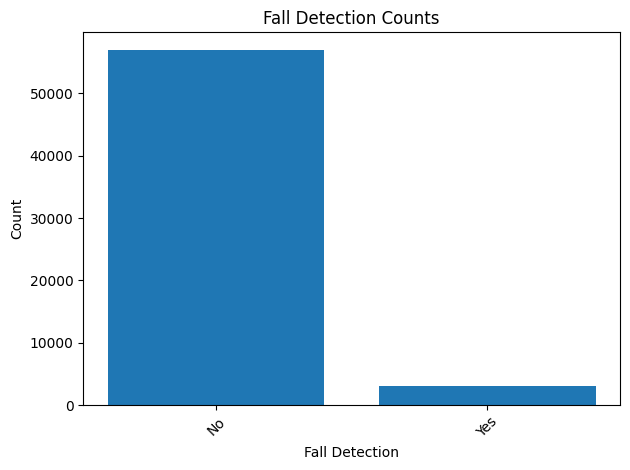

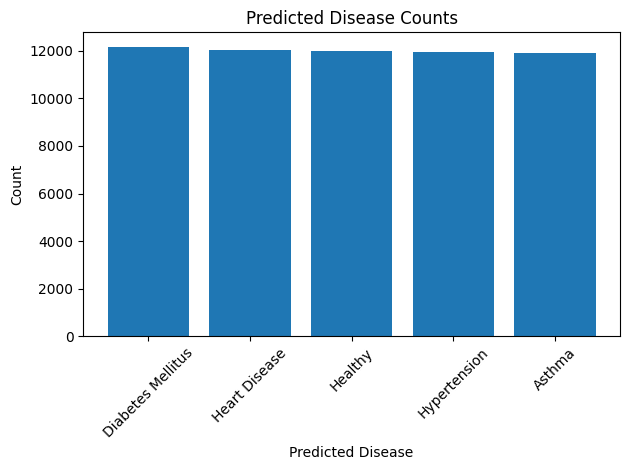

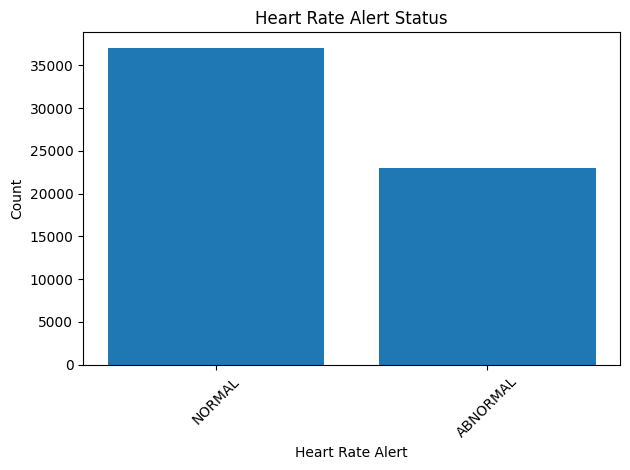

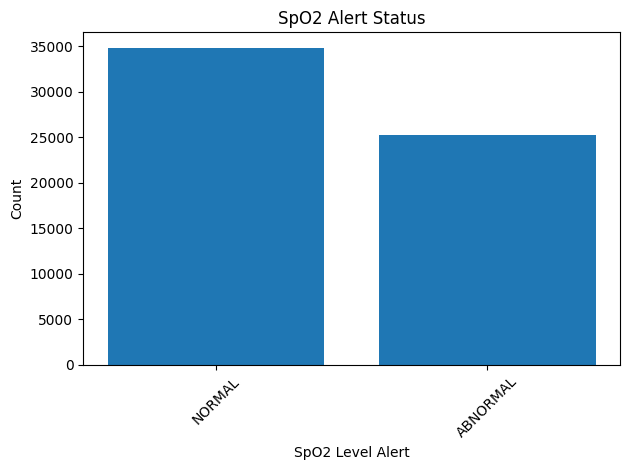

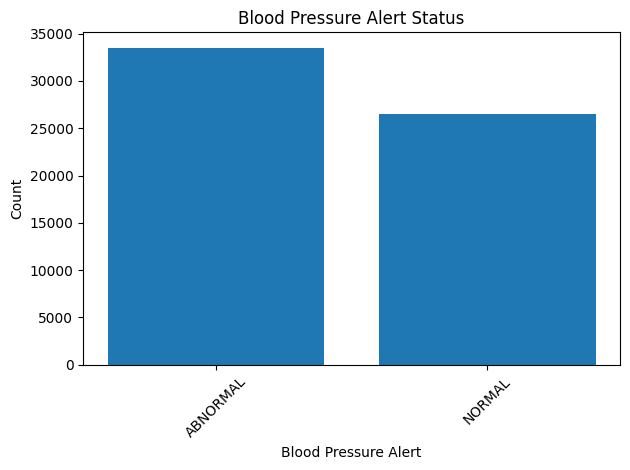

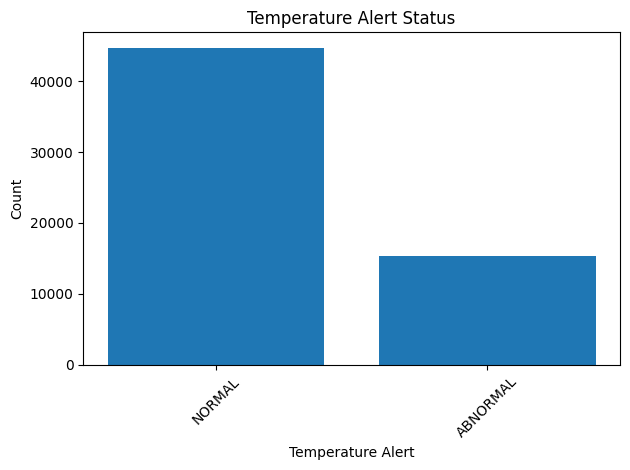

In [5]:

def plot_bar_counts(series, title):
    plt.figure()
    value_counts = series.value_counts()
    plt.bar(value_counts.index.astype(str), value_counts.values)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_bar_counts(df_clean[COL_FALL], "Fall Detection Counts")
plot_bar_counts(df_clean[COL_PRED_DIS], "Predicted Disease Counts")
plot_bar_counts(df_clean[COL_HR_ALERT], "Heart Rate Alert Status")
plot_bar_counts(df_clean[COL_SPO2_ALERT], "SpO2 Alert Status")
plot_bar_counts(df_clean[COL_BP_ALERT], "Blood Pressure Alert Status")
plot_bar_counts(df_clean[COL_TEMP_ALERT], "Temperature Alert Status")


Correlation matrix:
                                 Heart Rate (bpm)  SpO2 Level (%)  \
Heart Rate (bpm)                         1.000000       -0.209844   
SpO2 Level (%)                          -0.209844        1.000000   
Systolic Blood Pressure (mmHg)           0.247651        0.078241   
Diastolic Blood Pressure (mmHg)          0.171778        0.086256   
Body Temperature (°C)                    0.083455        0.002437   
Data Accuracy (%)                        0.009952       -0.001155   

                                 Systolic Blood Pressure (mmHg)  \
Heart Rate (bpm)                                       0.247651   
SpO2 Level (%)                                         0.078241   
Systolic Blood Pressure (mmHg)                         1.000000   
Diastolic Blood Pressure (mmHg)                        0.655083   
Body Temperature (°C)                                 -0.072781   
Data Accuracy (%)                                      0.006611   

                          

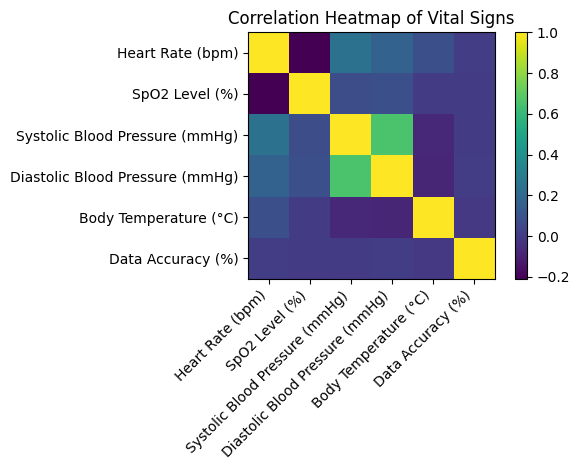

In [6]:

numeric_available = [c for c in numeric_cols if c in df_clean.columns]
corr_matrix = df_clean[numeric_available].corr()

print("Correlation matrix:")
print(corr_matrix)


plt.figure()
plt.imshow(corr_matrix, interpolation='nearest')
plt.title("Correlation Heatmap of Vital Signs")
plt.xticks(range(len(numeric_available)), numeric_available, rotation=45, ha="right")
plt.yticks(range(len(numeric_available)), numeric_available)
plt.colorbar()
plt.tight_layout()
plt.show()


In [7]:
group_cols = [COL_HR_ALERT, COL_SPO2_ALERT, COL_BP_ALERT, COL_TEMP_ALERT]

for gcol in group_cols:
    print(f"Grouped by {gcol} ")
    print(df_clean.groupby(gcol)[numeric_available].mean())


Grouped by Heart Rate Alert 
                  Heart Rate (bpm)  SpO2 Level (%)  \
Heart Rate Alert                                     
ABNORMAL                111.716751       93.893689   
NORMAL                   83.907061       94.963776   

                  Systolic Blood Pressure (mmHg)  \
Heart Rate Alert                                   
ABNORMAL                              147.074105   
NORMAL                                134.225860   

                  Diastolic Blood Pressure (mmHg)  Body Temperature (°C)  \
Heart Rate Alert                                                           
ABNORMAL                                92.823974              37.131537   
NORMAL                                  86.548010              37.115147   

                  Data Accuracy (%)  
Heart Rate Alert                     
ABNORMAL                   92.57254  
NORMAL                     92.47340  
Grouped by SpO2 Level Alert 
                  Heart Rate (bpm)  SpO2 Level (%)  \
SpO2 

In [ ]:

OUTPUT_PATH = "Synthetic_patient-HealthCare-Monitoring_dataset_cleaned.csv"
df_clean.to_csv(OUTPUT_PATH, index=False)
print(f"Cleaned dataset saved to: {OUTPUT_PATH}")


Cleaned dataset saved to: Synthetic_patient-HealthCare-Monitoring_dataset_cleaned.csv


Hypothesis 1 — Cardiovascular Stress Pattern
High heart rate is associated with elevated blood pressure, suggesting HR may serve as an early stress or hypertension indicator.

Hypothesis 2 — Respiratory Stress Indicators
Lower SpO₂ values may co-occur with higher heart rate or elevated body temperature — early signs of respiratory or infectious episodes.

Hypothesis 3 — Consistency of Alerts vs Vitals
Alert flags (NORMAL/ABNORMAL) should align with respective vitals. Misalignment may reveal opportunities to improve the AI-based alerting model.

Hypothesis 4 — Disease Prediction Model
Patterns across vitals may help predict Predicted Disease, enabling supervised classification modeling.

Hypothesis 5 — Abnormal Temperature Impact
Higher temperatures may correlate with abnormal heart rate or SpO₂ changes, forming the basis for illness detection/signaling.